<a href="https://colab.research.google.com/github/gah508/EPOCH_Beginner/blob/main/Review/jiyun_Week4_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌱 EPOCH 비기너 세션 4주차 복습문제**



---



## **1️⃣ 'market_2017.csv' 파일과 'market_2022.csv' 파일을 불러와 상가 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as pd

# 데이터 불러와, '데이터명'에 할당하기
market17 = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/market_2017.csv')
market22 = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/market_2022.csv')

# 할당한 데이터를 DataFrame으로 설정
market17 = pd.DataFrame(market17)
market22 = pd.DataFrame(market22)

# 데이터 확인
print(market17)
print(market22)

          상가업소번호         상호명 상권업종대분류코드  상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0       20741628     행운노래연습장         N  관광/여가/오락       N02  무도/유흥/가무   
1       20594635        유림식당         Q        음식       Q01        한식   
2       15551341  대동석유압구정주유소         F     생활서비스       F16   주유소/충전소   
3       20536992       이삭토스트         Q        음식       Q07     패스트푸드   
4       20537010     씨유수유빨래골         D        소매       D03     종합소매점   
...          ...         ...       ...       ...       ...       ...   
316073  17466883     스테이커피성수         Q        음식       Q12    커피점/카페   
316074  17530075        해연헤어         F     생활서비스       F01   이/미용/건강   
316075  17530095      NIWNIW         F     생활서비스       F01   이/미용/건강   
316076  17453590          샐디         Q        음식       Q01        한식   
316077  17453602       식사시간S         Q        음식       Q01        한식   

       상권업종소분류코드     상권업종소분류명 표준산업분류코드                  표준산업분류명  ...    시도명  \
0         N02A01          노래방   R91223                노래

### (1) 2017년도에는 존재했는데 2022년도에 사라진 편의점의 개수를 출력하세요.
* Hint: count()

In [6]:
convenience17 = market17.query('상권업종소분류명=="편의점"')
convenience22 = market22.query('상권업종소분류명=="편의점"')

convenience = pd.merge(convenience17, convenience22, on='상가업소번호', how='outer', indicator=True)
convenience = convenience.query('_merge == "right_only"').drop(columns=['_merge'])
print(len(convenience))

888


### (2) 2017년과 2022년 데이터를 비교하여, 서울특별시(시도명: "서울특별시") 내에서 위치 변경이 있었던 업소들을 찾으세요. 위치 변경 여부는 경도와 위도의 변화로 판단하고, 상호명과 변화된 위치(경도, 위도) 차이를 '경도차이', '위도차이' 열을 새로 생성하여 출력하세요. (경도차이, 위도차이는 절댓값으로 출력되지 않아도 됩니다.)
* Hint: 비교 연산자 사용 (|, =! 등)

In [9]:
seoul17 = market17.query('시도명=="서울특별시"')
seoul22 = market22.query('시도명=="서울특별시"')

seoul = pd.merge(seoul17, seoul22, on='상가업소번호', how='inner')
seoul_diff = seoul.query('(경도_x != 경도_y) or (위도_x != 위도_y)')
seoul_diff['경도차이'] = seoul_diff['경도_x'] - seoul_diff['경도_y']
seoul_diff['위도차이'] = seoul_diff['위도_x'] - seoul_diff['위도_y']

print(seoul_diff[['상호명_x', '경도차이', '위도차이']])

              상호명_x          경도차이      위도차이
264         Mr박의돈워리  1.961900e-03 -0.000272
301      1등공인중개사사무소 -5.460000e-04  0.000184
356          좋은집부동산  1.140000e-05 -0.000009
398            삼보상회 -1.734000e-04  0.000278
486            교촌치킨 -1.018000e-04 -0.000010
...             ...           ...       ...
243983           휠라  4.500000e-06 -0.000324
244182        씨씨콜렉트  2.676700e-03  0.000345
244283  신세계공인중개사사무소  7.354000e-04 -0.000012
244358       보은흑염소탕 -8.000000e-07  0.000054
244390   프레퍼스다이어트푸드  1.000000e-06 -0.000072

[1058 rows x 3 columns]


<ipython-input-9-7b6b59d1b6a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_diff['경도차이'] = seoul_diff['경도_x'] - seoul_diff['경도_y']
<ipython-input-9-7b6b59d1b6a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_diff['위도차이'] = seoul_diff['위도_x'] - seoul_diff['위도_y']


## **2️⃣‘movie_data.csv’ 파일을 불러와 영화 데이터를 시각화하세요.**

### (0) 데이터를 불러오세요.

In [10]:
movie = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/movies.csv')
movie = pd.DataFrame(movie)
print(movie)

                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

      score      votes         country 

### (1) 아래와 같은 평점('score') 상위 10개 영화의 관객 수에 대한 수평 막대 그래프를 그리세요.
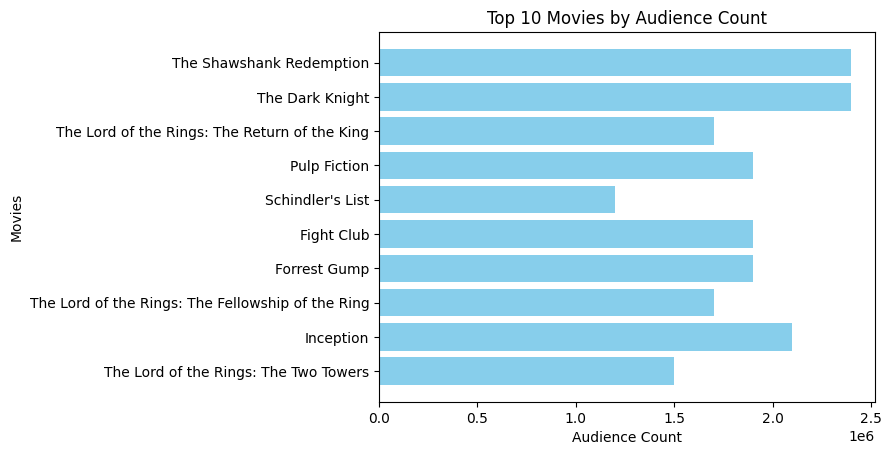

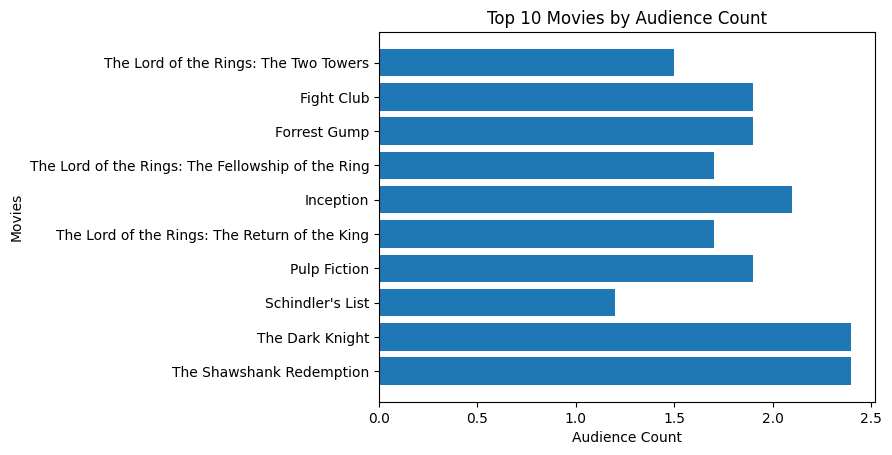

In [22]:
import matplotlib.pyplot as plt

movie_sort = movie.sort_values('score', ascending=False).head(10)

plt.barh(movie_sort['name'], movie_sort['votes']/1000000)
plt.yticks(movie_sort['name'], movie_sort['name'])
plt.xlabel('Audience Count')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Audience Count')
plt.show()

### (2) 아래와 같이 연도('year')별 평균 예산('budget')과 수익('gross')을 선 그래프로 나타내세요.
(사용한 색상은 b, forestgreen, orange, skyblue 입니다.)

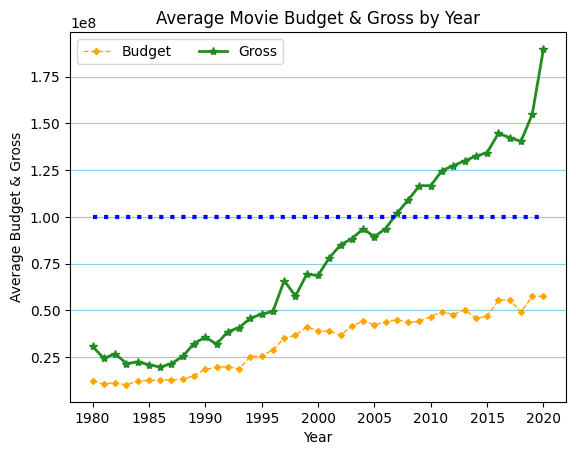

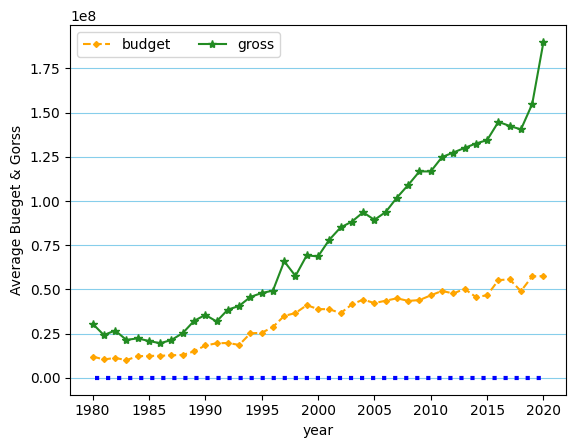

In [64]:
budget_mean = movie.groupby('year')['budget'].mean()
gross_mean = movie.groupby('year')['gross'].mean()

plt.plot(budget_mean.index, budget_mean.values, 'D--', markersize = 3, label='budget', color='orange')
plt.plot(gross_mean.index, gross_mean.values, '*-', label='gross', color='forestgreen')
plt.grid(True, axis='y', color='skyblue')
plt.axhline(1.00, 0.05, 0.95, color='b', linestyle='dotted', linewidth=3) # 이거 수평선 y값을 1로 지정했는데 왜 0.00에 그려질까요.........
plt.xlabel("year")
plt.ylabel("Average Bueget & Gorss")
plt.legend(ncol=2)
plt.show()